In [812]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

%matplotlib inline 
%pylab inline

pylab.rcParams['figure.figsize'] = (30, 15)

Populating the interactive namespace from numpy and matplotlib


In [709]:
# Reading input files

patient_data = pd.read_csv('Patientdata.csv')
hospital_data = pd.read_csv('Hospitaldata.csv')
diagnosis_data = pd.read_csv('Diagnosisdata.csv')

In [710]:
patient_data.head()

,patientID,race,gender,age,weight,Target,istrain
0,PT456611,type3,Female,[90-100),NaN,No,1
1,PT956824,type1,Male,[50-60),NaN,Yes,1
2,PT453330,type3,Female,[80-90),NaN,No,1
3,PT677563,type3,Female,[50-60),NaN,No,1
4,PT102924,type3,Male,[60-70),NaN,Yes,1


In [711]:
patient_data.shape

(31513, 7)

In [712]:
hospital_data.head()

,AdmissionID,patientID,Admission_date,Discharge_date,admission_type_id,admission_source_id,payer_code,medical_specialty,istrain
0,AD988251,PT456611,2015-05-04,2015-05-07,1,1,PC8,NaN,1
1,AD725487,PT956824,2014-02-20,2014-02-23,1,7,PC1,Oncology,1
2,AD492141,PT453330,2015-06-01,2015-06-04,1,7,PC8,NaN,1
3,AD561393,PT677563,2015-12-18,2015-12-20,2,1,NaN,Cardiology,1
4,AD619257,PT102924,2015-08-19,2015-08-20,3,1,NaN,NaN,1


In [713]:
hospital_data.shape

(31513, 9)

In [714]:
diagnosis_data.head()

,patientID,num_procedures,num_medications,num_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,...,troglitazone,tolazamide,insulin,glyburide.metformin,glipizide.metformin,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,istrain
0,PT456611,0,11,9,None,None,No,No,No,No,...,No,No,Steady,No,No,No,No,Ch,Yes,1
1,PT956824,1,6,6,None,None,No,No,No,No,...,No,No,No,No,No,No,No,No,No,1
2,PT453330,2,27,9,None,None,No,No,No,No,...,No,No,No,No,No,No,No,No,No,1
3,PT677563,3,10,5,None,None,No,No,No,No,...,No,No,Steady,No,No,No,No,No,Yes,1
4,PT102924,6,12,9,None,None,No,No,No,No,...,No,No,No,No,No,No,No,No,No,1


In [715]:
diagnosis_data.shape

(31513, 29)

In [716]:
# Joining all three dataframes on patientID and istrain

one=pd.merge(patient_data,hospital_data,how='inner',left_on=['patientID','istrain'],right_on=['patientID','istrain'])

In [717]:
two=pd.merge(one,diagnosis_data,how='inner',left_on=['patientID','istrain'],right_on=['patientID','istrain'])

In [718]:
# Joined df

two.head()

,patientID,race,gender,age,weight,Target,istrain,AdmissionID,Admission_date,Discharge_date,...,miglitol,troglitazone,tolazamide,insulin,glyburide.metformin,glipizide.metformin,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed
0,PT456611,type3,Female,[90-100),NaN,No,1,AD988251,2015-05-04,2015-05-07,...,No,No,No,Steady,No,No,No,No,Ch,Yes
1,PT956824,type1,Male,[50-60),NaN,Yes,1,AD725487,2014-02-20,2014-02-23,...,No,No,No,No,No,No,No,No,No,No
2,PT453330,type3,Female,[80-90),NaN,No,1,AD492141,2015-06-01,2015-06-04,...,No,No,No,No,No,No,No,No,No,No
3,PT677563,type3,Female,[50-60),NaN,No,1,AD561393,2015-12-18,2015-12-20,...,No,No,No,Steady,No,No,No,No,No,Yes
4,PT102924,type3,Male,[60-70),NaN,Yes,1,AD619257,2015-08-19,2015-08-20,...,No,No,No,No,No,No,No,No,No,No


In [719]:
# Distributions of labels of each categorical col in diagnosis data

for col in diagnosis_data.columns:
    if not col in ['patientID','num_procedures','num_medications','num_diagnoses','istrain']:
        print(diagnosis_data[col].value_counts())
        print()

None    30076
Norm      774
>200      384
>300      279
Name: max_glu_serum, dtype: int64

None    25699
>8       2737
Norm     1795
>7       1282
Name: A1Cresult, dtype: int64

No        24818
Steady     6109
Up          390
Down        196
Name: metformin, dtype: int64

No        31135
Steady      338
Up           29
Down         11
Name: repaglinide, dtype: int64

No        31312
Steady      192
Up            5
Down          4
Name: nateglinide, dtype: int64

No        31483
Steady       26
Up            2
Down          2
Name: chlorpropamide, dtype: int64

No        29863
Steady     1478
Up          103
Down         69
Name: glimepiride, dtype: int64

No    31513
Name: acetohexamide, dtype: int64

No        27720
Steady     3388
Up          251
Down        154
Name: glipizide, dtype: int64

No        28082
Steady     2983
Up          271
Down        177
Name: glyburide, dtype: int64

No        31507
Steady        6
Name: tolbutamide, dtype: int64

No        29258
Steady     2157
Up

In [720]:
diagnosis_data.corr()

,num_procedures,num_medications,num_diagnoses,istrain
num_procedures,1.000000,0.416328,0.081157,-0.004841
num_medications,0.416328,1.000000,0.257756,0.003373
num_diagnoses,0.081157,0.257756,1.000000,0.000554
istrain,-0.004841,0.003373,0.000554,1.000000


In [721]:
two.head()

,patientID,race,gender,age,weight,Target,istrain,AdmissionID,Admission_date,Discharge_date,...,miglitol,troglitazone,tolazamide,insulin,glyburide.metformin,glipizide.metformin,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed
0,PT456611,type3,Female,[90-100),NaN,No,1,AD988251,2015-05-04,2015-05-07,...,No,No,No,Steady,No,No,No,No,Ch,Yes
1,PT956824,type1,Male,[50-60),NaN,Yes,1,AD725487,2014-02-20,2014-02-23,...,No,No,No,No,No,No,No,No,No,No
2,PT453330,type3,Female,[80-90),NaN,No,1,AD492141,2015-06-01,2015-06-04,...,No,No,No,No,No,No,No,No,No,No
3,PT677563,type3,Female,[50-60),NaN,No,1,AD561393,2015-12-18,2015-12-20,...,No,No,No,Steady,No,No,No,No,No,Yes
4,PT102924,type3,Male,[60-70),NaN,Yes,1,AD619257,2015-08-19,2015-08-20,...,No,No,No,No,No,No,No,No,No,No


In [814]:
# Splitting the data wrt istrain col

train = two[two.istrain==1]
test = two[two.istrain==0]

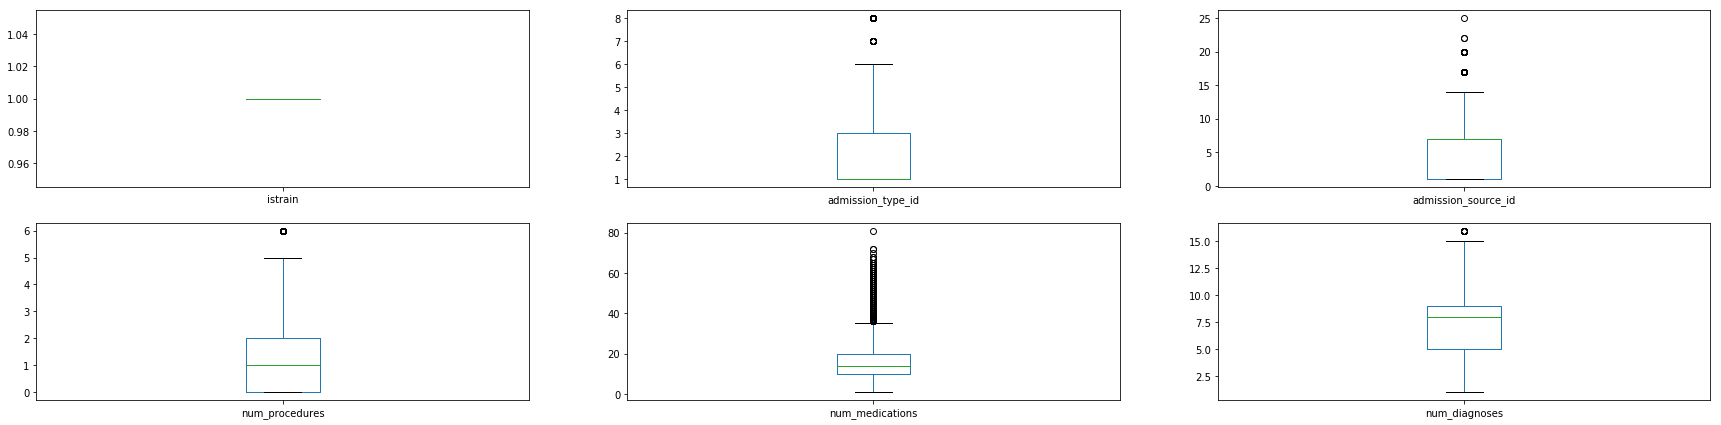

In [723]:
train.plot(kind='box', subplots=True, layout=(4, 3), sharex=False, sharey=False)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d12f0ea58>,
      dtype=object)

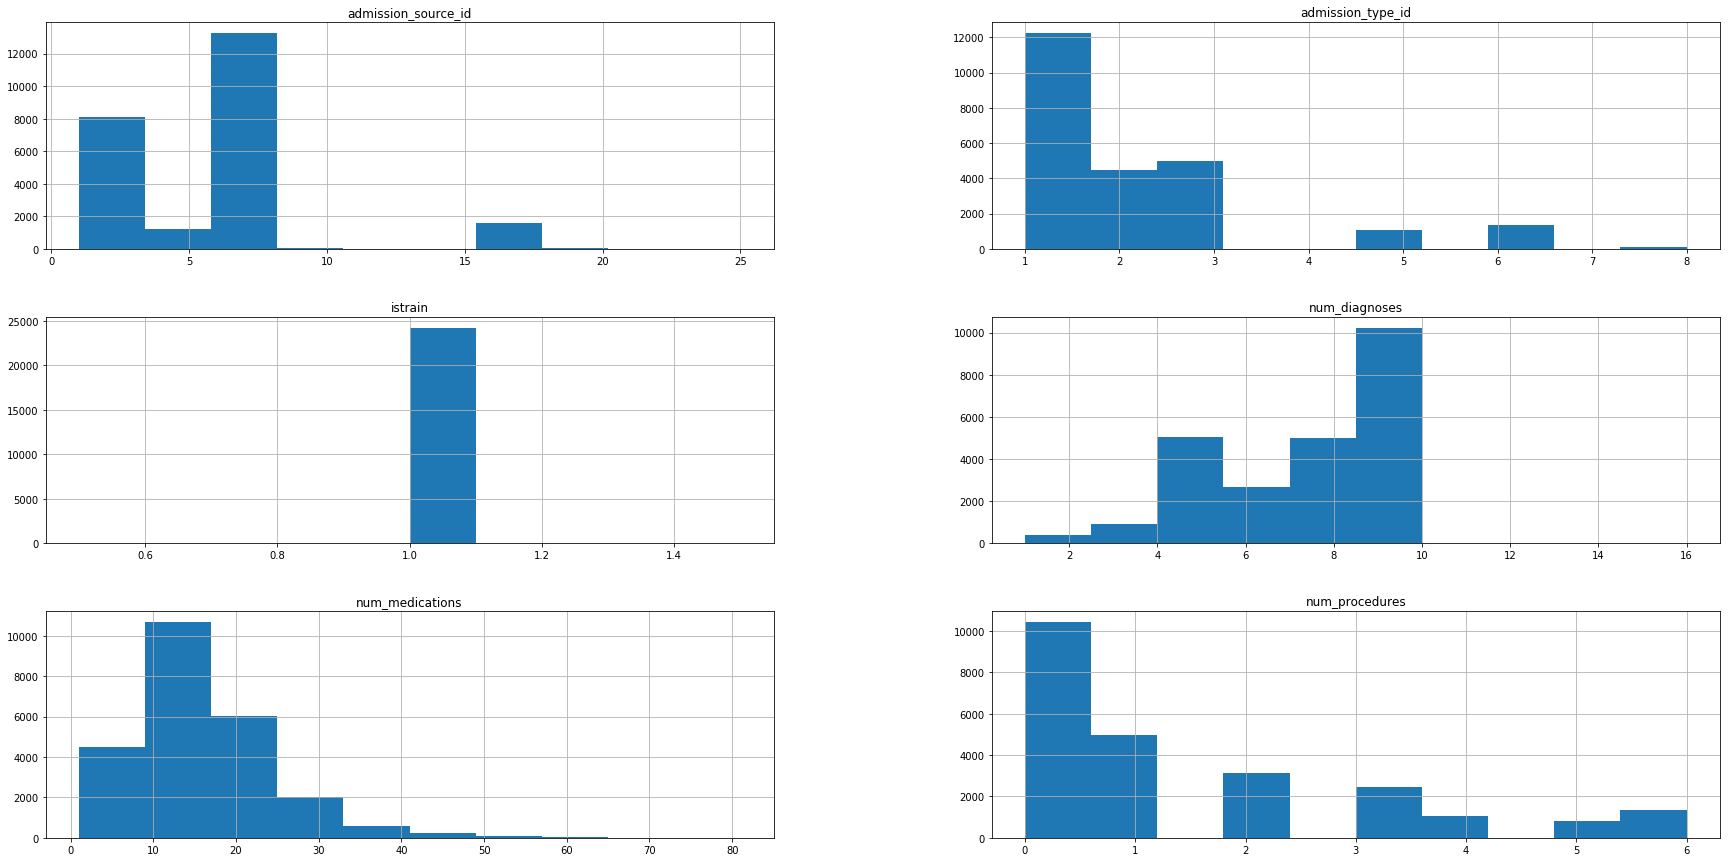

In [724]:
train.hist()

Text(0,0.5,'Count')

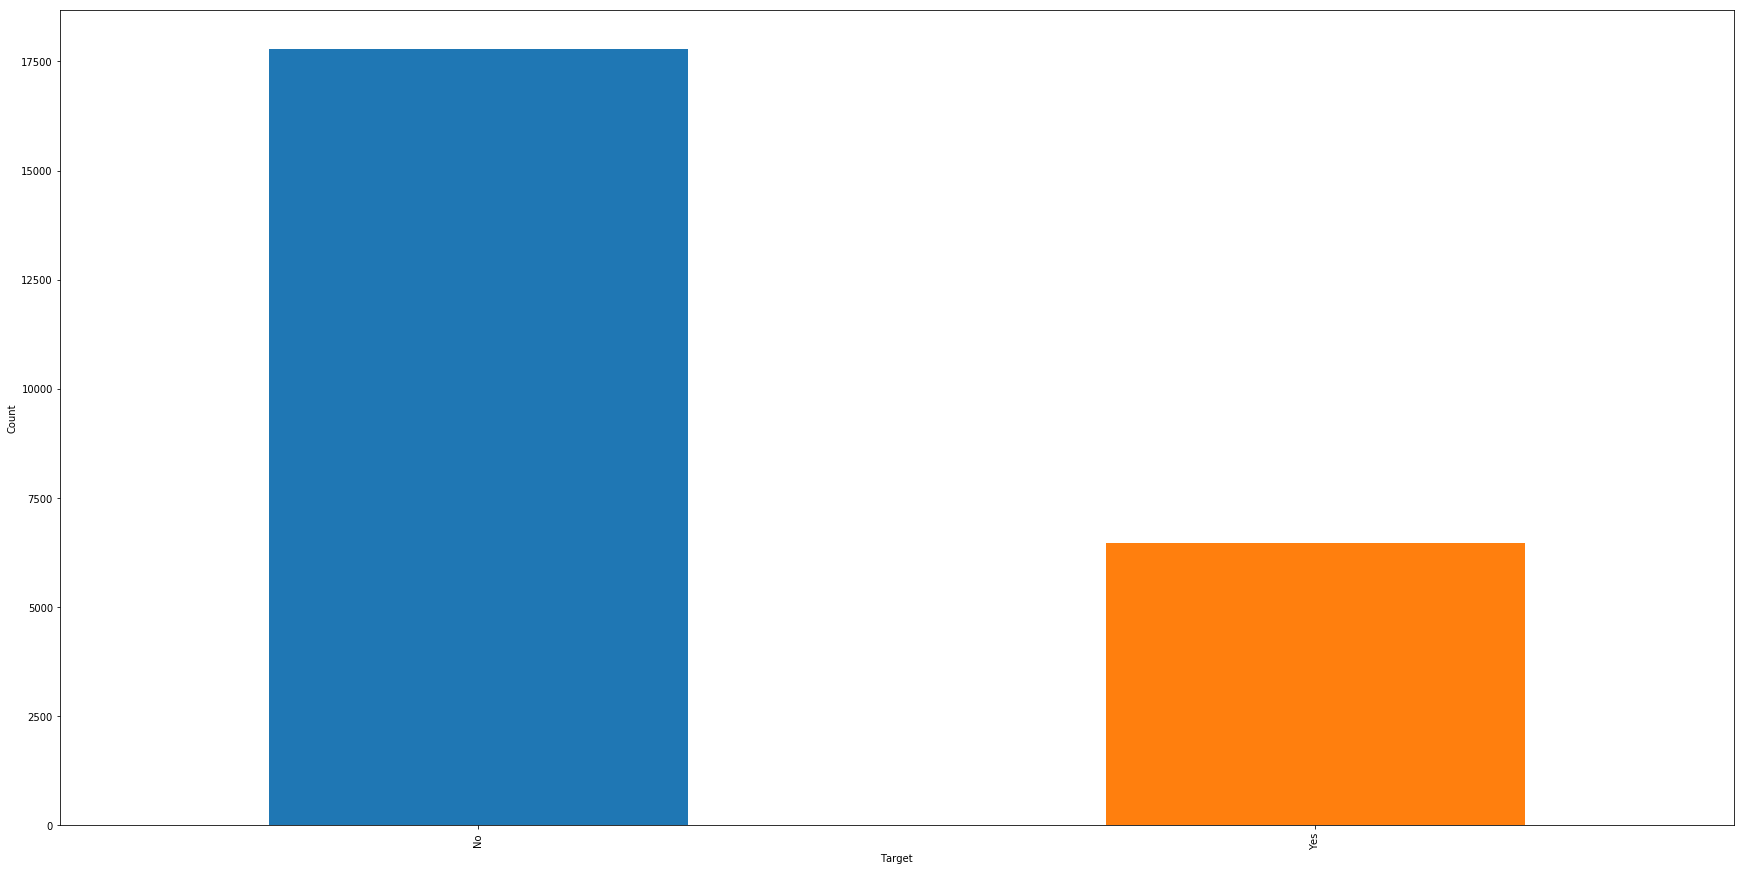

In [725]:
train.groupby('Target').size().plot(kind='bar')
plt.ylabel('Count')

Text(0,0.5,'Count')

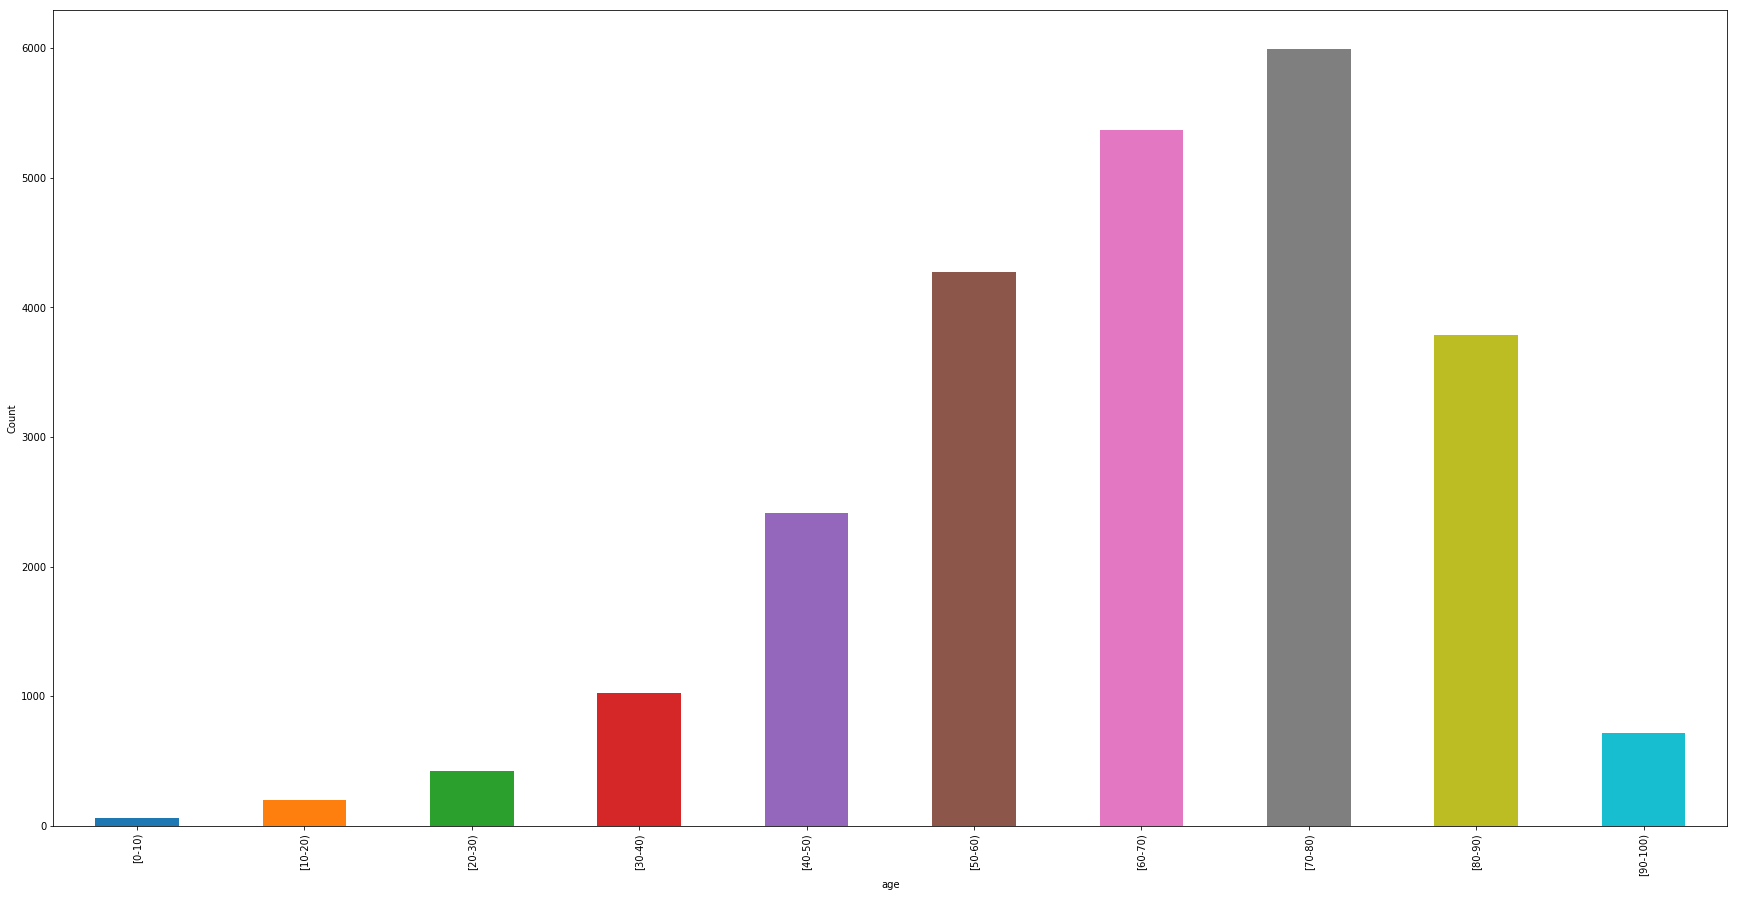

In [726]:
train.groupby('age').size().plot(kind='bar')
plt.ylabel('Count')

/home/ggk/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ggk/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Text(0,0.5,'Count')

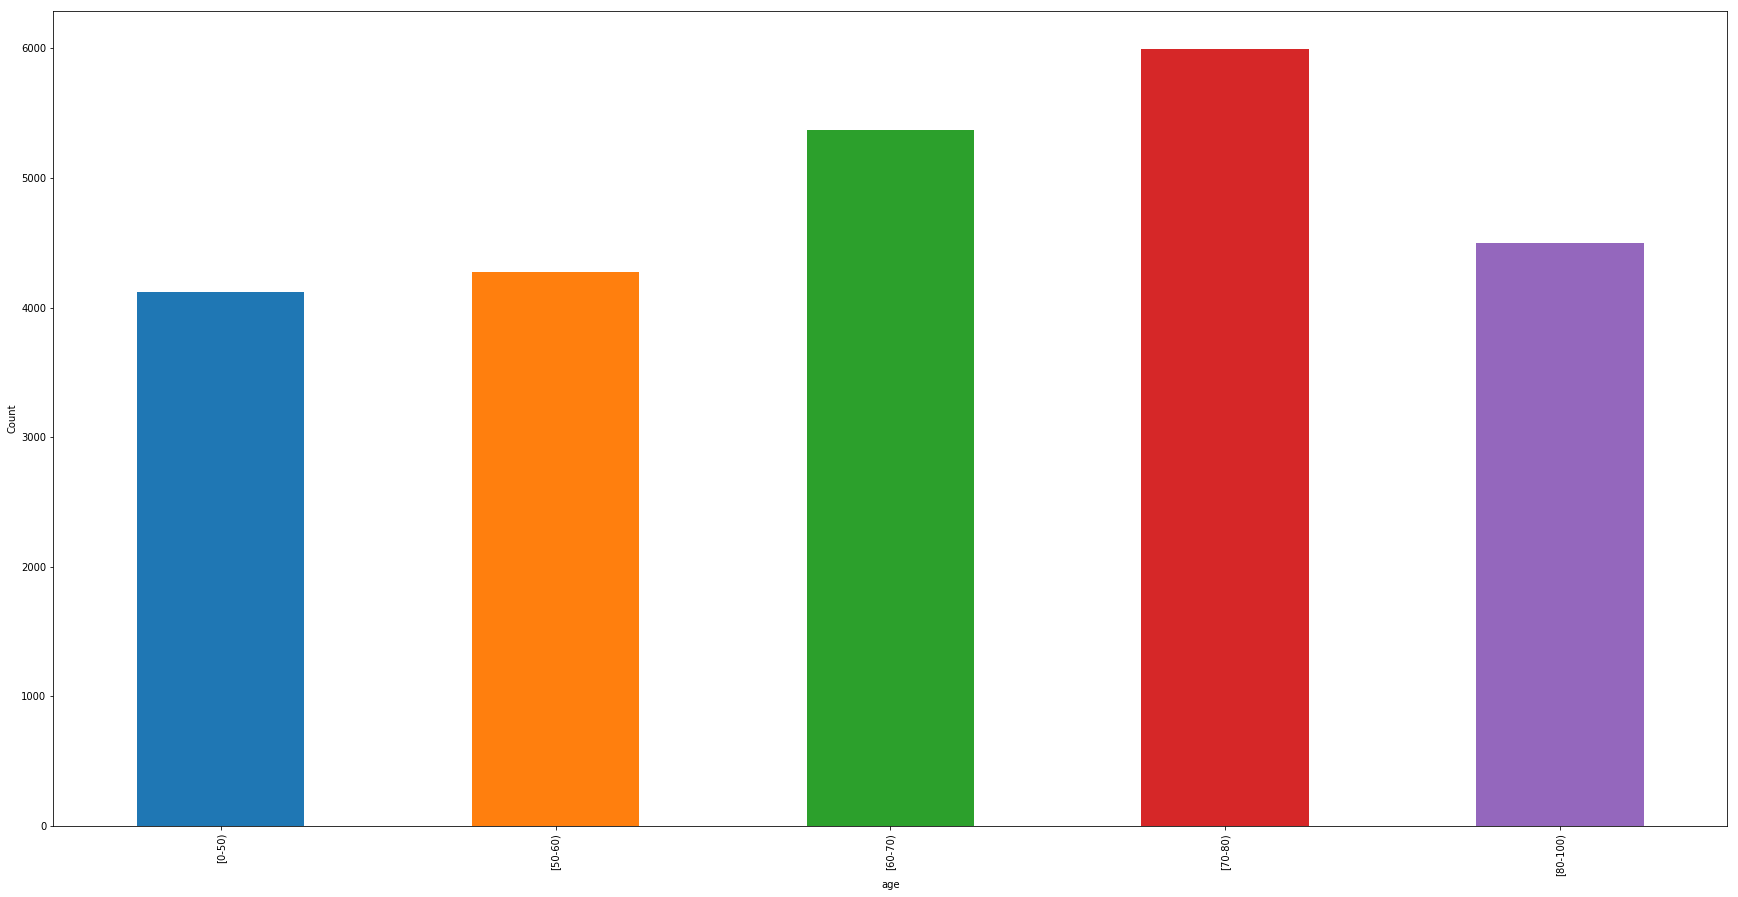

In [727]:
# On hold
train['age'] = pd.Series(['[0-50)' if val in ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)'] else val 
                         for val in train['age']], index=train.index)
train['age'] = pd.Series(['[80-100)' if val in ['[80-90)', '[90-100)'] else val 
                         for val in train['age']], index=train.index)

train.groupby('age').size().plot(kind='bar')
plt.ylabel('Count')

In [728]:
train.shape

(24256, 41)

In [729]:
test.shape

(7257, 41)

In [730]:
# Most of the values are missing in weight column (only 3% filled values) 
print(len(train.weight))
train.weight.value_counts()

24256


[75-100)     290
[50-75)      227
[100-125)    137
[125-150)     27
[25-50)       24
[0-25)         7
[150-175)      5
[175-200)      2
Name: weight, dtype: int64

In [731]:
train.medical_specialty.unique()

array([nan, 'Oncology', 'Cardiology', 'InternalMedicine', 'Surgery-Neuro',
       'Orthopedics', 'Obstetrics', 'Family/GeneralPractice',
       'Emergency/Trauma', 'Neurology', 'Psychiatry', 'Surgery-Vascular',
       'Radiologist', 'Nephrology', 'Orthopedics-Reconstructive',
       'Surgery-General', 'Pediatrics', 'Urology', 'Pulmonology',
       'ObstetricsandGynecology', 'Surgery-Thoracic',
       'PhysicalMedicineandRehabilitation', 'Osteopath', 'Otolaryngology',
       'Surgery-Cardiovascular/Thoracic', 'Surgery-Cardiovascular',
       'Gastroenterology', 'Hematology/Oncology', 'Surgery-Pediatric',
       'Hospitalist', 'Ophthalmology', 'Surgery-Maxillofacial',
       'Endocrinology', 'Surgery-Plastic',
       'Obsterics&Gynecology-GynecologicOnco', 'Pediatrics-Neurology',
       'Gynecology', 'Hematology', 'Pediatrics-CriticalCare',
       'Psychology', 'Pediatrics-Endocrinology', 'Radiology', 'Podiatry',
       'Perinatology', 'Surgeon', 'Rheumatology',
       'Anesthesiology-Pe

In [732]:
train.head()

,patientID,race,gender,age,weight,Target,istrain,AdmissionID,Admission_date,Discharge_date,...,miglitol,troglitazone,tolazamide,insulin,glyburide.metformin,glipizide.metformin,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed
0,PT456611,type3,Female,[80-100),NaN,No,1,AD988251,2015-05-04,2015-05-07,...,No,No,No,Steady,No,No,No,No,Ch,Yes
1,PT956824,type1,Male,[50-60),NaN,Yes,1,AD725487,2014-02-20,2014-02-23,...,No,No,No,No,No,No,No,No,No,No
2,PT453330,type3,Female,[80-100),NaN,No,1,AD492141,2015-06-01,2015-06-04,...,No,No,No,No,No,No,No,No,No,No
3,PT677563,type3,Female,[50-60),NaN,No,1,AD561393,2015-12-18,2015-12-20,...,No,No,No,Steady,No,No,No,No,No,Yes
4,PT102924,type3,Male,[60-70),NaN,Yes,1,AD619257,2015-08-19,2015-08-20,...,No,No,No,No,No,No,No,No,No,No


In [733]:
# New feature - subtracted admitted date from discharge date to get number of days patient is admitted 

train['N_Days_Admitted']=(pd.to_datetime(train.Discharge_date).apply(lambda x:x.date())-pd.to_datetime(train.Admission_date).apply(lambda x:x.date()))

/home/ggk/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [734]:
train.sort_values('N_Days_Admitted',ascending=False).head()

,patientID,race,gender,age,weight,Target,istrain,AdmissionID,Admission_date,Discharge_date,...,troglitazone,tolazamide,insulin,glyburide.metformin,glipizide.metformin,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,N_Days_Admitted
18925,PT757956,type3,Female,[70-80),NaN,No,1,AD278568,2015-02-06,2015-02-20,...,No,No,Up,No,No,No,No,Ch,Yes,14 days
15686,PT902594,type1,Female,[80-100),NaN,Yes,1,AD174504,2015-05-17,2015-05-31,...,No,No,Up,No,No,No,No,Ch,Yes,14 days
9255,PT727019,type3,Male,[70-80),NaN,Yes,1,AD84769,2014-09-03,2014-09-17,...,No,No,Up,No,No,No,No,Ch,Yes,14 days
19114,PT844,type3,Male,[80-100),NaN,No,1,AD527737,2014-10-13,2014-10-27,...,No,No,No,No,No,No,No,No,No,14 days
16193,PT986689,type3,Female,[0-50),NaN,Yes,1,AD467284,2014-10-20,2014-11-03,...,No,No,Up,No,No,No,No,Ch,Yes,14 days


In [735]:
# New features - Which season is patient admitted in - 3 parts

tmp=pd.to_datetime(train.Admission_date).apply(lambda x:x.date().month)
train['admitted_in_season_1']=tmp.apply(lambda x:1 if x in [1,2,3,4] else 0)
train['admitted_in_season_2']=tmp.apply(lambda x:1 if x in [5,6,7,8] else 0)
train['admitted_in_season_3']=tmp.apply(lambda x:1 if x in [9,10,11,12] else 0)

/home/ggk/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/ggk/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/ggk/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.p

In [736]:
train[['admitted_in_season_1','admitted_in_season_2','admitted_in_season_3','Target']].corr()

,admitted_in_season_1,admitted_in_season_2,admitted_in_season_3
admitted_in_season_1,1.000000,-0.578309,-0.492151
admitted_in_season_2,-0.578309,1.000000,-0.425562
admitted_in_season_3,-0.492151,-0.425562,1.000000


In [737]:
train.columns

Index(['patientID', 'race', 'gender', 'age', 'weight', 'Target', 'istrain',
       'AdmissionID', 'Admission_date', 'Discharge_date', 'admission_type_id',
       'admission_source_id', 'payer_code', 'medical_specialty',
       'num_procedures', 'num_medications', 'num_diagnoses', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide.metformin', 'glipizide.metformin', 'metformin.rosiglitazone',
       'metformin.pioglitazone', 'change', 'diabetesMed', 'N_Days_Admitted',
       'admitted_in_season_1', 'admitted_in_season_2', 'admitted_in_season_3'],
      dtype='object')

In [738]:
trainn = train.copy()

In [739]:
trainn.columns

Index(['patientID', 'race', 'gender', 'age', 'weight', 'Target', 'istrain',
       'AdmissionID', 'Admission_date', 'Discharge_date', 'admission_type_id',
       'admission_source_id', 'payer_code', 'medical_specialty',
       'num_procedures', 'num_medications', 'num_diagnoses', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide.metformin', 'glipizide.metformin', 'metformin.rosiglitazone',
       'metformin.pioglitazone', 'change', 'diabetesMed', 'N_Days_Admitted',
       'admitted_in_season_1', 'admitted_in_season_2', 'admitted_in_season_3'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d12f16d68>,
      dtype=object)

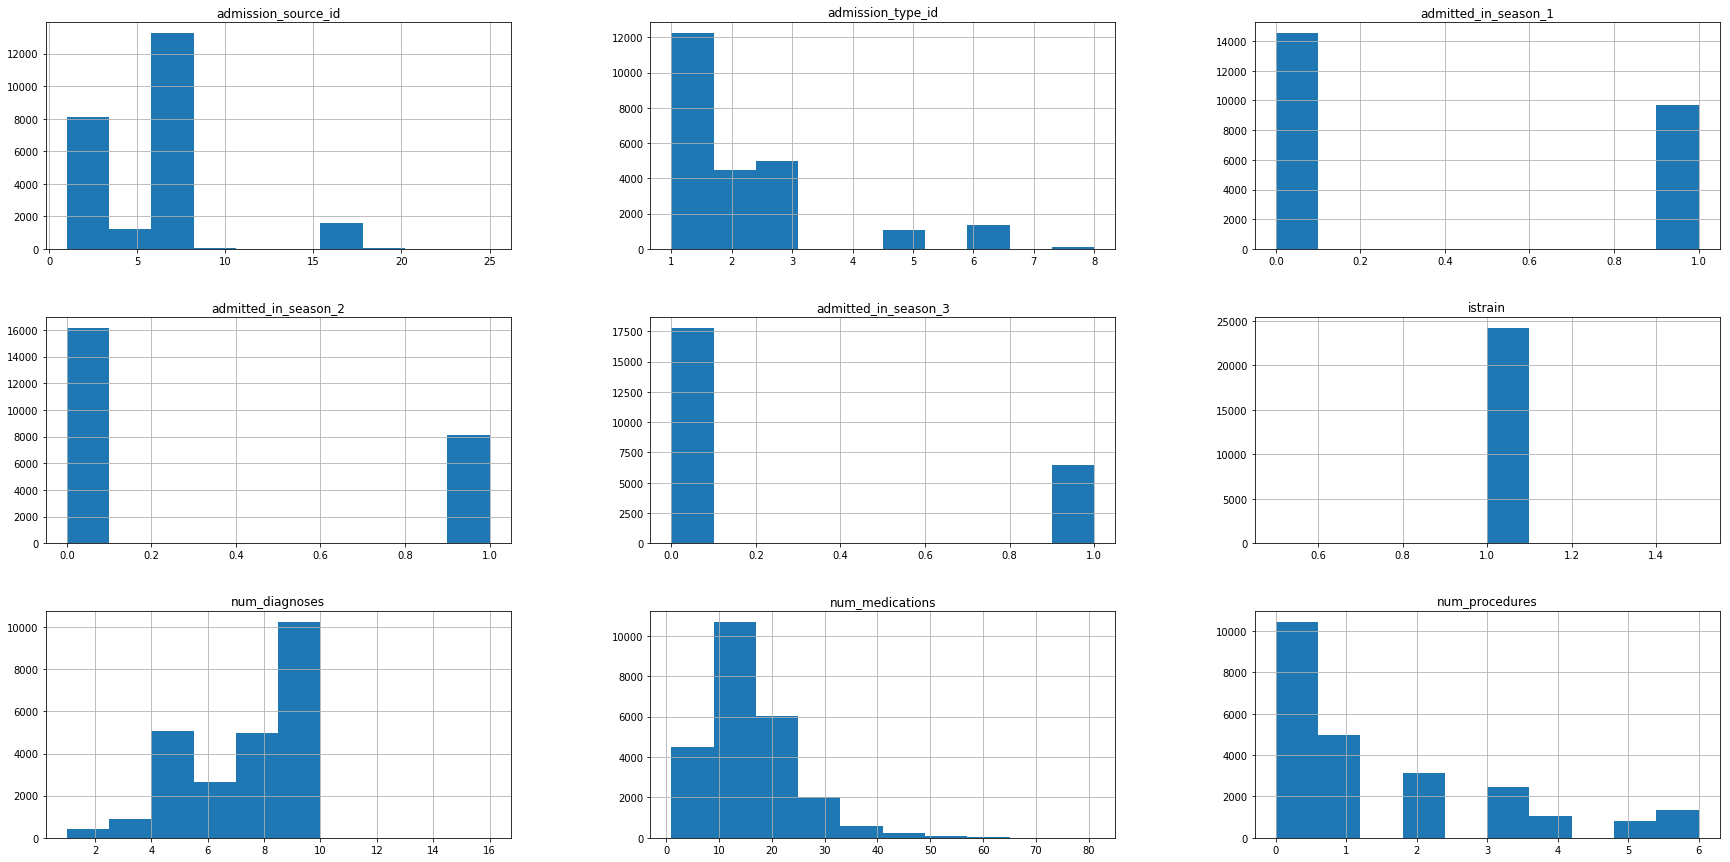

In [740]:
trainn.hist()

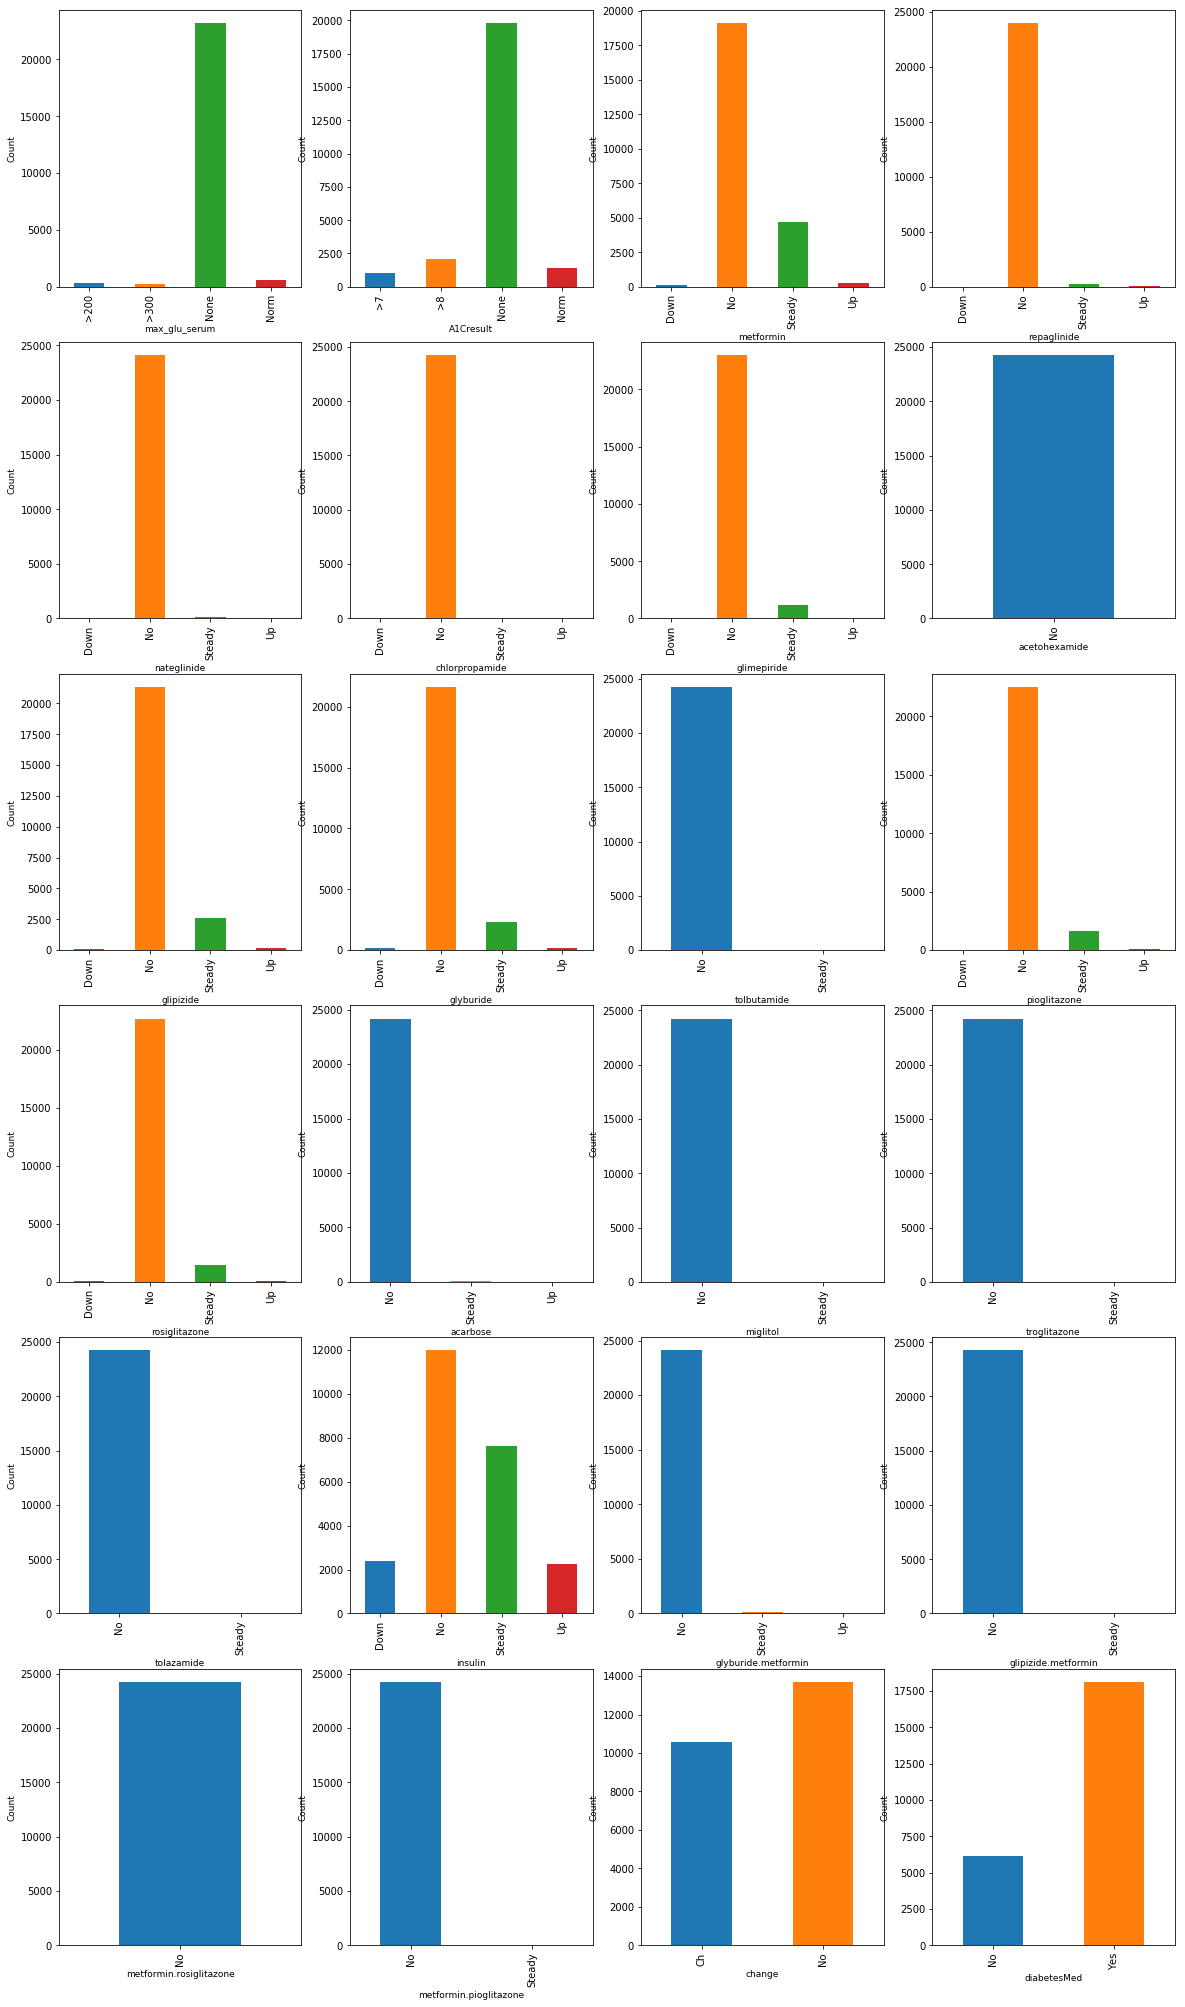

In [741]:
fig = plt.figure(figsize=(20,60))
ax=1

for x in ['max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide','glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin','glyburide.metformin', 'glipizide.metformin', 'metformin.rosiglitazone',
       'metformin.pioglitazone', 'change', 'diabetesMed']:
    ax1 = fig.add_subplot(10,4,ax)
    ax1 = trainn.groupby(x).size().plot(kind='bar')
    plt.xlabel(x, fontsize=9)
    plt.ylabel('Count', fontsize=9)
    ax+=1

In [742]:
# Dropped these cols as their flags distribution is not good.
trainn.drop(['metformin.pioglitazone','metformin.rosiglitazone','weight',
             'glipizide.metformin','tolazamide','troglitazone','miglitol',
             'tolbutamide','acetohexamide','acarbose','chlorpropamide',
             'glyburide.metformin','nateglinide','repaglinide','glimepiride',
             'pioglitazone','rosiglitazone'
            ],axis=1,inplace=True)

#       ['max_glu_serum', 'A1Cresult', 'metformin',
#        'glipizide', 'glyburide', 'insulin']

In [743]:
trainn.columns

Index(['patientID', 'race', 'gender', 'age', 'Target', 'istrain',
       'AdmissionID', 'Admission_date', 'Discharge_date', 'admission_type_id',
       'admission_source_id', 'payer_code', 'medical_specialty',
       'num_procedures', 'num_medications', 'num_diagnoses', 'max_glu_serum',
       'A1Cresult', 'metformin', 'glipizide', 'glyburide', 'insulin', 'change',
       'diabetesMed', 'N_Days_Admitted', 'admitted_in_season_1',
       'admitted_in_season_2', 'admitted_in_season_3'],
      dtype='object')

In [744]:
# Compresses number of categories based on value counts

def compress_categories(max_cat, prop2_cat, compress_categories):
    for colname in compress_categories: 
        not_top_n=prop2_cat[colname].value_counts().sort_values(ascending=False).index[max_cat-1:]
    
        if (len(not_top_n) == 0 ):
            pass
        else:
            prop2_cat[colname].replace(not_top_n,'other',inplace=True)
    return prop2_cat

In [745]:
compress_categories(5,trainn,['admission_type_id','admission_source_id']).head(10)

,patientID,race,gender,age,Target,istrain,AdmissionID,Admission_date,Discharge_date,admission_type_id,...,metformin,glipizide,glyburide,insulin,change,diabetesMed,N_Days_Admitted,admitted_in_season_1,admitted_in_season_2,admitted_in_season_3
0,PT456611,type3,Female,[80-100),No,1,AD988251,2015-05-04,2015-05-07,1,...,No,No,No,Steady,Ch,Yes,3 days,0,1,0
1,PT956824,type1,Male,[50-60),Yes,1,AD725487,2014-02-20,2014-02-23,1,...,No,No,No,No,No,No,3 days,1,0,0
2,PT453330,type3,Female,[80-100),No,1,AD492141,2015-06-01,2015-06-04,1,...,No,No,No,No,No,No,3 days,0,1,0
3,PT677563,type3,Female,[50-60),No,1,AD561393,2015-12-18,2015-12-20,2,...,No,No,No,Steady,No,Yes,2 days,0,0,1
4,PT102924,type3,Male,[60-70),Yes,1,AD619257,2015-08-19,2015-08-20,3,...,No,No,No,No,No,No,1 days,0,1,0
5,PT899812,type3,Male,[70-80),Yes,1,AD753421,2015-04-12,2015-04-15,2,...,No,No,No,No,No,No,3 days,1,0,0
6,PT42059,type3,Male,[70-80),No,1,AD378459,2016-04-12,2016-04-14,2,...,No,No,No,No,No,No,2 days,1,0,0
7,PT889522,type3,Female,[70-80),No,1,AD910895,2016-05-29,2016-06-06,1,...,No,No,No,No,No,No,8 days,0,1,0
8,PT994247,type3,Male,[60-70),No,1,AD170270,2014-07-16,2014-07-19,1,...,Steady,No,Steady,No,Ch,Yes,3 days,0,1,0
9,PT544052,type3,Male,[60-70),No,1,AD564354,2015-08-22,2015-08-23,other,...,No,No,No,Steady,No,Yes,1 days,0,1,0


In [746]:
# Replacing all surgery categories in medical_specialty with single category name

trainn['medical_specialty'] = trainn['medical_specialty'].apply(lambda x:'SurgeryRelated' if x in ['Surgery-Neuro', 'Surgery-Vascular', 'Surgery-General',
       'Surgery-Thoracic', 'Surgery-Cardiovascular/Thoracic',
       'Surgery-Cardiovascular', 'Surgery-Pediatric',
       'Surgery-Maxillofacial', 'Surgery-Plastic', 'Surgeon',
       'Surgery-Colon&Rectal'] else x)

In [747]:
trainn[trainn['medical_specialty']=='SurgeryRelated'].head()

,patientID,race,gender,age,Target,istrain,AdmissionID,Admission_date,Discharge_date,admission_type_id,...,metformin,glipizide,glyburide,insulin,change,diabetesMed,N_Days_Admitted,admitted_in_season_1,admitted_in_season_2,admitted_in_season_3
10,PT147110,type1,Female,[70-80),Yes,1,AD65915,2015-09-16,2015-09-17,3,...,No,No,No,No,No,Yes,1 days,0,0,1
12,PT24613,type3,Female,[50-60),No,1,AD308997,2016-03-18,2016-03-19,2,...,No,No,No,No,No,No,1 days,1,0,0
54,PT585415,type3,Male,[0-50),No,1,AD434481,2015-03-14,2015-03-17,other,...,Steady,Steady,No,Down,Ch,Yes,3 days,1,0,0
80,PT264970,type3,Male,[70-80),Yes,1,AD405280,2015-12-31,2016-01-09,3,...,Steady,No,No,No,No,Yes,9 days,0,0,1
100,PT728233,type3,Male,[60-70),Yes,1,AD151910,2016-01-08,2016-01-09,3,...,No,No,No,No,No,No,1 days,1,0,0


In [748]:
# before
trainn.medical_specialty.value_counts()

InternalMedicine                        3757
Family/GeneralPractice                  1713
Emergency/Trauma                        1428
Cardiology                              1407
SurgeryRelated                          1336
Orthopedics                              431
Orthopedics-Reconstructive               403
Radiologist                              287
ObstetricsandGynecology                  255
Nephrology                               237
Psychiatry                               234
Pulmonology                              215
Urology                                  203
Gastroenterology                         149
Oncology                                  83
PhysicalMedicineandRehabilitation         79
Neurology                                 77
Pediatrics-Endocrinology                  67
Pediatrics                                62
Hematology/Oncology                       53
Otolaryngology                            42
Endocrinology                             33
Pediatrics

In [749]:
# compressing no. of categories in 'medical_specialty' col
compress_categories(5,trainn,['medical_specialty']).head()

,patientID,race,gender,age,Target,istrain,AdmissionID,Admission_date,Discharge_date,admission_type_id,...,metformin,glipizide,glyburide,insulin,change,diabetesMed,N_Days_Admitted,admitted_in_season_1,admitted_in_season_2,admitted_in_season_3
0,PT456611,type3,Female,[80-100),No,1,AD988251,2015-05-04,2015-05-07,1,...,No,No,No,Steady,Ch,Yes,3 days,0,1,0
1,PT956824,type1,Male,[50-60),Yes,1,AD725487,2014-02-20,2014-02-23,1,...,No,No,No,No,No,No,3 days,1,0,0
2,PT453330,type3,Female,[80-100),No,1,AD492141,2015-06-01,2015-06-04,1,...,No,No,No,No,No,No,3 days,0,1,0
3,PT677563,type3,Female,[50-60),No,1,AD561393,2015-12-18,2015-12-20,2,...,No,No,No,Steady,No,Yes,2 days,0,0,1
4,PT102924,type3,Male,[60-70),Yes,1,AD619257,2015-08-19,2015-08-20,3,...,No,No,No,No,No,No,1 days,0,1,0


In [750]:
#after
trainn.medical_specialty.value_counts()

other                     4474
InternalMedicine          3757
Family/GeneralPractice    1713
Emergency/Trauma          1428
Cardiology                1407
Name: medical_specialty, dtype: int64

In [751]:
trainn.columns

Index(['patientID', 'race', 'gender', 'age', 'Target', 'istrain',
       'AdmissionID', 'Admission_date', 'Discharge_date', 'admission_type_id',
       'admission_source_id', 'payer_code', 'medical_specialty',
       'num_procedures', 'num_medications', 'num_diagnoses', 'max_glu_serum',
       'A1Cresult', 'metformin', 'glipizide', 'glyburide', 'insulin', 'change',
       'diabetesMed', 'N_Days_Admitted', 'admitted_in_season_1',
       'admitted_in_season_2', 'admitted_in_season_3'],
      dtype='object')

In [752]:
# Encoding labels

# trainn['gender'] = trainn.gender.map({'Male':1,'Female':0})
# trainn['change'] = trainn.change.map({'Ch':1,'No':0})
# trainn['diabetesMed'] = trainn.diabetesMed.map({'Yes':1,'No':0})
trainn['admission_type_id'] = trainn['admission_type_id'].replace({'other':0})
trainn['admission_source_id'] = trainn['admission_source_id'].replace({'other':0})

labels_mapper = {'gender':{'Male':1,'Female':0},'change':{'Ch':1,'No':0},'diabetesMed':{'Yes':1,'No':0}}

# Getting n_days in int from datetime datatype
trainn['N_Days_Admitted'] = trainn.N_Days_Admitted.apply(lambda x:x.days)

# Considering minimum age in rach age group. Eg. for [30-40), took 30 as age
# trainn['age'] = trainn.age.str.extract(r"\[(\d{2})*", expand=True)
# Filled missing values with mode
# trainn['age'] = trainn.age.fillna(trainn.age.mode()[0]).astype(int)

In [753]:
trainn.columns

Index(['patientID', 'race', 'gender', 'age', 'Target', 'istrain',
       'AdmissionID', 'Admission_date', 'Discharge_date', 'admission_type_id',
       'admission_source_id', 'payer_code', 'medical_specialty',
       'num_procedures', 'num_medications', 'num_diagnoses', 'max_glu_serum',
       'A1Cresult', 'metformin', 'glipizide', 'glyburide', 'insulin', 'change',
       'diabetesMed', 'N_Days_Admitted', 'admitted_in_season_1',
       'admitted_in_season_2', 'admitted_in_season_3'],
      dtype='object')

In [754]:
trainn.admission_type_id.value_counts()

1    12235
3     4998
2     4463
6     1338
0     1222
Name: admission_type_id, dtype: int64

In [755]:
# LabelEncoding on other categorical columns. Filled missing values with mode
# https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn

from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
lab_mapper = defaultdict(LabelEncoder)

cat_cols = ['gender','change','diabetesMed','race','age','max_glu_serum',
            'medical_specialty','A1Cresult', 'metformin', 'glipizide', 'glyburide',
            'insulin','admission_type_id','admission_source_id']

for col in cat_cols:
#     le = LabelEncoder()
#     trainn[col] = le.fit_transform(trainn[col].fillna(trainn[col].mode()[0]))
    print(col)
    trainn[col] = lab_mapper[col].fit_transform(trainn[col].fillna(trainn[col].mode()[0]))
    labels_mapper[col] = dict(zip(lab_mapper[col].classes_, lab_mapper[col].transform(lab_mapper[col].classes_)))
    
#     trainn[col] = d[col].fit_transform(trainn[col].fillna(trainn[col].mode()[0]))
#     d[col].transform(ttt.race)

trainn.head()

gender
change
diabetesMed
race
age
max_glu_serum
medical_specialty
A1Cresult
metformin
glipizide
glyburide
insulin
admission_type_id
admission_source_id


,patientID,race,gender,age,Target,istrain,AdmissionID,Admission_date,Discharge_date,admission_type_id,...,metformin,glipizide,glyburide,insulin,change,diabetesMed,N_Days_Admitted,admitted_in_season_1,admitted_in_season_2,admitted_in_season_3
0,PT456611,2,0,4,No,1,AD988251,2015-05-04,2015-05-07,1,...,1,1,1,2,0,1,3,0,1,0
1,PT956824,0,1,1,Yes,1,AD725487,2014-02-20,2014-02-23,1,...,1,1,1,1,1,0,3,1,0,0
2,PT453330,2,0,4,No,1,AD492141,2015-06-01,2015-06-04,1,...,1,1,1,1,1,0,3,0,1,0
3,PT677563,2,0,1,No,1,AD561393,2015-12-18,2015-12-20,2,...,1,1,1,2,1,1,2,0,0,1
4,PT102924,2,1,2,Yes,1,AD619257,2015-08-19,2015-08-20,3,...,1,1,1,1,1,0,1,0,1,0


In [756]:
labels_mapper

{'gender': {'Female': 0, 'Male': 1},
 'change': {'Ch': 0, 'No': 1},
 'diabetesMed': {'No': 0, 'Yes': 1},
 'race': {'type1': 0, 'type2': 1, 'type3': 2, 'type4': 3, 'type5': 4},
 'age': {'[0-50)': 0, '[50-60)': 1, '[60-70)': 2, '[70-80)': 3, '[80-100)': 4},
 'max_glu_serum': {'>200': 0, '>300': 1, 'None': 2, 'Norm': 3},
 'medical_specialty': {'Cardiology': 0,
  'Emergency/Trauma': 1,
  'Family/GeneralPractice': 2,
  'InternalMedicine': 3,
  'other': 4},
 'A1Cresult': {'>7': 0, '>8': 1, 'None': 2, 'Norm': 3},
 'metformin': {'Down': 0, 'No': 1, 'Steady': 2, 'Up': 3},
 'glipizide': {'Down': 0, 'No': 1, 'Steady': 2, 'Up': 3},
 'glyburide': {'Down': 0, 'No': 1, 'Steady': 2, 'Up': 3},
 'insulin': {'Down': 0, 'No': 1, 'Steady': 2, 'Up': 3},
 'admission_type_id': {0: 0, 1: 1, 2: 2, 3: 3, 6: 4},
 'admission_source_id': {0: 0, 1: 1, 4: 2, 7: 3, 17: 4}}

In [757]:
trainn.columns

Index(['patientID', 'race', 'gender', 'age', 'Target', 'istrain',
       'AdmissionID', 'Admission_date', 'Discharge_date', 'admission_type_id',
       'admission_source_id', 'payer_code', 'medical_specialty',
       'num_procedures', 'num_medications', 'num_diagnoses', 'max_glu_serum',
       'A1Cresult', 'metformin', 'glipizide', 'glyburide', 'insulin', 'change',
       'diabetesMed', 'N_Days_Admitted', 'admitted_in_season_1',
       'admitted_in_season_2', 'admitted_in_season_3'],
      dtype='object')

In [758]:
trainn.head()

,patientID,race,gender,age,Target,istrain,AdmissionID,Admission_date,Discharge_date,admission_type_id,...,metformin,glipizide,glyburide,insulin,change,diabetesMed,N_Days_Admitted,admitted_in_season_1,admitted_in_season_2,admitted_in_season_3
0,PT456611,2,0,4,No,1,AD988251,2015-05-04,2015-05-07,1,...,1,1,1,2,0,1,3,0,1,0
1,PT956824,0,1,1,Yes,1,AD725487,2014-02-20,2014-02-23,1,...,1,1,1,1,1,0,3,1,0,0
2,PT453330,2,0,4,No,1,AD492141,2015-06-01,2015-06-04,1,...,1,1,1,1,1,0,3,0,1,0
3,PT677563,2,0,1,No,1,AD561393,2015-12-18,2015-12-20,2,...,1,1,1,2,1,1,2,0,0,1
4,PT102924,2,1,2,Yes,1,AD619257,2015-08-19,2015-08-20,3,...,1,1,1,1,1,0,1,0,1,0


In [759]:
# Stored some selected columns in temp for just in case and dropping
temp=trainn[['patientID','AdmissionID','Admission_date','Discharge_date','payer_code']]
trainn.drop(['patientID','AdmissionID','Admission_date','Discharge_date','payer_code','istrain'],inplace=True,axis=1)

In [760]:
y = trainn['Target'].map({'Yes':1,'No':0})
trainn.drop(['Target'],axis=1,inplace=True)
X = trainn

In [761]:
X.age.unique()

array([4, 1, 2, 3, 0])

In [762]:
X.columns

Index(['race', 'gender', 'age', 'admission_type_id', 'admission_source_id',
       'medical_specialty', 'num_procedures', 'num_medications',
       'num_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'glipizide',
       'glyburide', 'insulin', 'change', 'diabetesMed', 'N_Days_Admitted',
       'admitted_in_season_1', 'admitted_in_season_2', 'admitted_in_season_3'],
      dtype='object')

In [763]:
# https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn.ensemble import RandomForestClassifier  #GBM algorithm
from xgboost import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4


def modelfit(alg, dtrain, y, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain, y)
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain)
    print(pd.Series(dtrain_predictions).value_counts())
    dtrain_predprob = alg.predict_proba(dtrain)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain, y, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(y.values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(y, dtrain_predprob))
    print(metrics.confusion_matrix(y.values, dtrain_predictions))
    
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, dtrain.columns).sort_values(ascending=False)
#         feat_imp.plot(kind='bar', title='Feature Importances')
#         plt.ylabel('Feature Importance Score')


In [764]:
X = pd.get_dummies(X,columns=['race','age','medical_specialty','max_glu_serum', 'A1Cresult', 'metformin',
       'glipizide', 'glyburide', 'insulin','admission_source_id','admission_type_id'])

In [765]:
X.columns

Index(['gender', 'num_procedures', 'num_medications', 'num_diagnoses',
       'change', 'diabetesMed', 'N_Days_Admitted', 'admitted_in_season_1',
       'admitted_in_season_2', 'admitted_in_season_3', 'race_0', 'race_1',
       'race_2', 'race_3', 'race_4', 'age_0', 'age_1', 'age_2', 'age_3',
       'age_4', 'medical_specialty_0', 'medical_specialty_1',
       'medical_specialty_2', 'medical_specialty_3', 'medical_specialty_4',
       'max_glu_serum_0', 'max_glu_serum_1', 'max_glu_serum_2',
       'max_glu_serum_3', 'A1Cresult_0', 'A1Cresult_1', 'A1Cresult_2',
       'A1Cresult_3', 'metformin_0', 'metformin_1', 'metformin_2',
       'metformin_3', 'glipizide_0', 'glipizide_1', 'glipizide_2',
       'glipizide_3', 'glyburide_0', 'glyburide_1', 'glyburide_2',
       'glyburide_3', 'insulin_0', 'insulin_1', 'insulin_2', 'insulin_3',
       'admission_source_id_0', 'admission_source_id_1',
       'admission_source_id_2', 'admission_source_id_3',
       'admission_source_id_4', 'admission_t

In [766]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [767]:
#################################################################################################################
# Model 1
#################################################################################################################
rfm = RandomForestClassifier(random_state=10,max_depth=9, min_samples_split=400,n_estimators=80)
modelfit(rfm, X_train, y_train)

# Model Report
# CV Score : Mean - 0.5581176 | Std - 0.003996661 | Min - 0.5509565 | Max - 0.5625496

0    19404
dtype: int64

Model Report
Accuracy : 0.7331
AUC Score (Train): 0.626791
[[14225     0]
 [ 5179     0]]
CV Score : Mean - 0.5529093 | Std - 0.007442274 | Min - 0.5448382 | Max - 0.5658291


In [768]:
rfm.score(X_test,y_test)

0.733924154987634

In [769]:
metrics.confusion_matrix(y_test, rfm.predict(X_test))

array([[3561,    0],
       [1291,    0]])

In [770]:
#################################################################################################################
# Model 2
#################################################################################################################
rfm = RandomForestClassifier(random_state=10)
modelfit(rfm, X_train, y_train)

0    14801
1     4603
dtype: int64

Model Report
Accuracy : 0.9693
AUC Score (Train): 0.998798
[[14215    10]
 [  586  4593]]
CV Score : Mean - 0.513101 | Std - 0.007282083 | Min - 0.5016803 | Max - 0.5240529


In [771]:
rfm.score(X_test,y_test)

0.7112530915086562

In [772]:
metrics.confusion_matrix(y_test, rfm.predict(X_test))

array([[3370,  191],
       [1210,   81]])

In [773]:
#################################################################################################################
# Model 3
#################################################################################################################
gbc = GradientBoostingClassifier(random_state=10,n_estimators=40,max_depth=7,min_samples_split=1000)
modelfit(gbc, X_train, y_train)

0    19384
1       20
dtype: int64

Model Report
Accuracy : 0.7341
AUC Score (Train): 0.651874
[[14225     0]
 [ 5159    20]]
CV Score : Mean - 0.549284 | Std - 0.003178534 | Min - 0.5461187 | Max - 0.5552266


In [774]:
gbc.score(X_test,y_test)

0.7337180544105524

In [775]:
# pd.Series(xgb.predict(X_test)).value_counts()
metrics.confusion_matrix(y_test, gbc.predict(X_test))

array([[3558,    3],
       [1289,    2]])

In [776]:
#################################################################################################################
# Model 4
#################################################################################################################
xgb = XGBClassifier(random_state=10,n_estimators=50,max_depth=13,min_samples_split=1000)
modelfit(xgb, X_train, y_train)

/home/ggk/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0    16753
1     2651
dtype: int64

Model Report
Accuracy : 0.8689
AUC Score (Train): 0.983971
[[14217     8]
 [ 2536  2643]]
CV Score : Mean - 0.5233046 | Std - 0.004902739 | Min - 0.5154082 | Max - 0.5296987


In [777]:
xgb.score(X_test,y_test)

/home/ggk/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7238252267106348

In [778]:
# pd.Series(xgb.predict(X_test)).value_counts()
metrics.confusion_matrix(y_test, xgb.predict(X_test))

/home/ggk/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([[3462,   99],
       [1241,   50]])

In [779]:
y_test.value_counts()

0    3561
1    1291
Name: Target, dtype: int64

In [780]:
param_test1 = {'n_estimators':list(range(20,81,10))}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X,y)

gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_
# param_test1 = {'n_estimators':list(range(20,81,10))}
# gsearch1 = GridSearchCV(estimator = RandomForestClassifier(min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',random_state=10), 
# param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
# gsearch1.fit(X,y)

# gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.55302, std: 0.00451, params: {'n_estimators': 20},
  mean: 0.55315, std: 0.00529, params: {'n_estimators': 30},
  mean: 0.55456, std: 0.00369, params: {'n_estimators': 40},
  mean: 0.55395, std: 0.00374, params: {'n_estimators': 50},
  mean: 0.55257, std: 0.00374, params: {'n_estimators': 60},
  mean: 0.55137, std: 0.00376, params: {'n_estimators': 70},
  mean: 0.55212, std: 0.00386, params: {'n_estimators': 80}],
 {'n_estimators': 40},
 0.5545588836082358)

In [781]:
param_test2 = {'max_depth':list(range(5,16,2)), 'min_samples_split':list(range(200,1001,200))}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=40, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X,y)

gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

# param_test2 = {'max_depth':list(range(5,16,2)), 'min_samples_split':list(range(200,1001,200))}
# gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators=80, max_features='sqrt', random_state=10), 
# param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
# gsearch2.fit(X,y)

# gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.55340, std: 0.00504, params: {'max_depth': 5, 'min_samples_split': 200},
  mean: 0.55624, std: 0.00213, params: {'max_depth': 5, 'min_samples_split': 400},
  mean: 0.55434, std: 0.00294, params: {'max_depth': 5, 'min_samples_split': 600},
  mean: 0.55411, std: 0.00257, params: {'max_depth': 5, 'min_samples_split': 800},
  mean: 0.55607, std: 0.00427, params: {'max_depth': 5, 'min_samples_split': 1000},
  mean: 0.54975, std: 0.00487, params: {'max_depth': 7, 'min_samples_split': 200},
  mean: 0.55498, std: 0.00336, params: {'max_depth': 7, 'min_samples_split': 400},
  mean: 0.55542, std: 0.00319, params: {'max_depth': 7, 'min_samples_split': 600},
  mean: 0.55255, std: 0.00473, params: {'max_depth': 7, 'min_samples_split': 800},
  mean: 0.55633, std: 0.00462, params: {'max_depth': 7, 'min_samples_split': 1000},
  mean: 0.54795, std: 0.00504, params: {'max_depth': 9, 'min_samples_split': 200},
  mean: 0.55377, std: 0.00301, params: {'max_depth': 9, 'min_samples_split': 400},
  

In [782]:
from sklearn.externals import joblib

filename = 'patient_readmission.pkl'
joblib.dump({'model':xgb,'labels_mapper':labels_mapper,'labels_mapper2':lab_mapper,'all_columns':X.columns}, filename, compress=9)

['patient_readmission.pkl']

In [815]:
# Submission file for test

tmp=pd.to_datetime(test.Admission_date).apply(lambda x:x.date().month)
test['admitted_in_season_1']=tmp.apply(lambda x:1 if x in [1,2,3,4] else 0)
test['admitted_in_season_2']=tmp.apply(lambda x:1 if x in [5,6,7,8] else 0)
test['admitted_in_season_3']=tmp.apply(lambda x:1 if x in [9,10,11,12] else 0)
dummy_cols = ['gender', 'change', 'diabetesMed', 'race', 'age', 'max_glu_serum', 
            'medical_specialty', 'A1Cresult', 'metformin', 'glipizide', 'glyburide', 'insulin', 
            'admission_type_id', 'admission_source_id']
test['N_Days_Admitted']=(pd.to_datetime(test.Discharge_date).apply(lambda x:x.date())-pd.to_datetime(test.Admission_date).apply(lambda x:x.date()))
test['N_Days_Admitted'] = test.N_Days_Admitted.apply(lambda x:x.days)
test['age'] = pd.Series(['[0-50)' if val in ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)'] else val 
                         for val in test['age']], index=test.index)
test['age'] = pd.Series(['[80-100)' if val in ['[80-90)', '[90-100)'] else val 
                         for val in test['age']], index=test.index)

for x in dummy_cols:
    if x == 'medical_specialty':
        #if not input_json[x] in ['Cardiology', 'Emergency/Trauma', 'Family/GeneralPractice', 'InternalMedicine']: input_json[x] = 'other'    
        test[x].apply(lambda y:y if y in ['Cardiology', 'Emergency/Trauma', 'Family/GeneralPractice', 'InternalMedicine'] else 'other')

    test[x] = test[x].map(labels_mapper[x])
test_patient_ids = test.patientID
test_outcomes = test.Target
test = pd.get_dummies(test,columns=dummy_cols)
test = test.reindex(columns=X.columns,fill_value=0)



In [816]:
test['outcomes']=xgb.predict(test)

In [817]:
test['patientID'] = test_patient_ids
test[['patientID','outcomes']].to_csv('Submission.csv',index=False)